# K-MEANS

#### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import Data

In [2]:
cust = pd.read_csv(r"D:\SEMESTER 4\IS411 Data Modelling\LAB\IS411_C-HY_00000054804_Christopher Darren_Week-11\Customer.csv")
cust.head(5)

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33


In [3]:
cust.info()
cust.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   IDPelanggan             200 non-null    int64 
 1   Kelamin                 200 non-null    object
 2   Usia                    200 non-null    int64 
 3   Rating_belanja (1-100)  200 non-null    int64 
 4   Pendapatan (juta Rp)    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(200, 5)

In [4]:
cust.describe()

,IDPelanggan,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,50.200000,60.560000
std,57.879185,13.969007,25.823522,26.264721
min,1.000000,18.000000,1.000000,15.000000
25%,50.750000,28.750000,34.750000,41.500000
50%,100.500000,36.000000,50.000000,61.500000
75%,150.250000,49.000000,73.000000,78.000000
max,200.000000,70.000000,99.000000,137.000000


In [5]:
cust.isnull().sum()

IDPelanggan               0
Kelamin                   0
Usia                      0
Rating_belanja (1-100)    0
Pendapatan (juta Rp)      0
dtype: int64

##### 1. Importing into DataFrame

In [6]:
X = pd.DataFrame(data=cust)
X.head(5)

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33


In [7]:
#encoding

def encode_data(feature_name):
    '''
    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with
    '''
    mapping_dict = {}
    
    unique_values = list(X[feature_name].unique())
    
    
    for idx in range(len(unique_values)):
        
        mapping_dict[unique_values[idx]] = idx
        
    return mapping_dict


X['Kelamin'].replace({'Laki':0,'Perempuan': 1}, inplace = True)

In [8]:
X.head(5)

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,1,23,87,29
1,2,0,60,4,30
2,3,1,21,73,30
3,4,0,53,4,33
4,5,0,18,92,33


##### 2. Info data

In [9]:
X.info()
X.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   IDPelanggan             200 non-null    int64
 1   Kelamin                 200 non-null    int64
 2   Usia                    200 non-null    int64
 3   Rating_belanja (1-100)  200 non-null    int64
 4   Pendapatan (juta Rp)    200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


(200, 5)

##### 3. Statistical Data

In [10]:
X.describe()

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,50.200000,60.560000
std,57.879185,0.497633,13.969007,25.823522,26.264721
min,1.000000,0.000000,18.000000,1.000000,15.000000
25%,50.750000,0.000000,28.750000,34.750000,41.500000
50%,100.500000,1.000000,36.000000,50.000000,61.500000
75%,150.250000,1.000000,49.000000,73.000000,78.000000
max,200.000000,1.000000,70.000000,99.000000,137.000000


### Menggunakan metode elbow untuk menentukan angka cluster yang tepat

##### 4. Menggunakan metode elbow untuk menentukan angka cluster yang tepat.

In [11]:
X = cust.iloc[:, [3,4]].values

C:\Users\Darren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


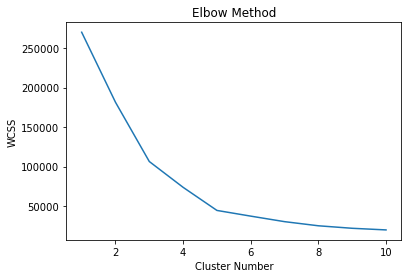

In [12]:
#menggunakan metode elbow untuk menentukan angka cluster yang tepat

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i , init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()
 

##### 5. Menjalankan K-Means Clustering ke dataset.

In [13]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state= 42)
y_means = kmeans.fit_predict(X)

##### 6. Visualisasi hasil clusters.

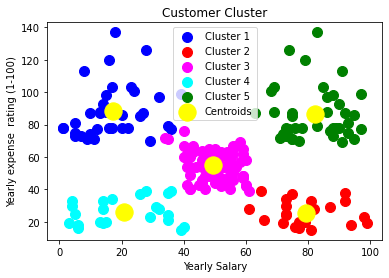

In [14]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c= 'blue', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c= 'red', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c= 'magenta', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c= 'cyan', label = 'Cluster 4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c= 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow', label = 'Centroids')
plt.title('Customer Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense  rating (1-100)')
plt.legend()
plt.show()

### Challenge

#### 1. Sebuah department store ingin menganalisa kelompok perilaku belanja dari pelanggannya, dengan data set yang diberikan buatlah analisa:
###### a. gunakan kolom ke 2 hingga 4 sebagai input features
###### b. dengan metode elbow, analisa jumlah cluster yang tepat
###### c. gunakan K-Means clustering dan analisa hasilnya

In [15]:
#a. Define 2 to 4 features
X1 = cust.iloc[:, [1,4]].values

C:\Users\Darren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


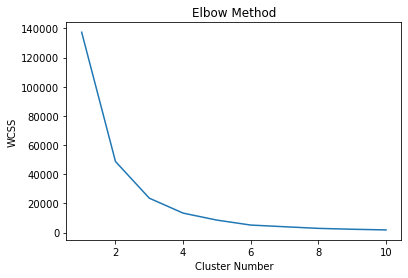

In [16]:
#b. menggunakan metode elbow untuk menentukan angka cluster yang tepat

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i , init='k-means++', random_state= 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

##### berdasarkan hasil Elbow method tersebut maka jumlah cluster yang dihasilkan adalah n=3 clusters

In [17]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++', random_state= 42)
y1_means = kmeans.fit_predict(X1)

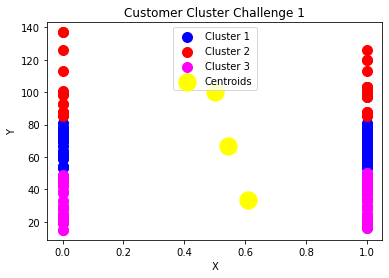

In [18]:
#c. Hasil visualisasi plot
plt.scatter(X1[y1_means == 0, 0], X1[y1_means == 0, 1], s = 100, c= 'blue', label = 'Cluster 1')
plt.scatter(X1[y1_means == 1, 0], X1[y1_means == 1, 1], s = 100, c= 'red', label = 'Cluster 2')
plt.scatter(X1[y1_means == 2, 0], X1[y1_means == 2, 1], s = 100, c= 'magenta', label = 'Cluster 3')
#plt.scatter(X1[y1_means == 3, 0], X1[y1_means == 3, 1], s = 100, c= 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c= 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow', label = 'Centroids')
plt.title('Customer Cluster Challenge 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 2. Sebuah department store ingin menganalisa kelompok perilaku belanja dari pelanggannya, dengan data set yang diberikan buatlah analisa:
###### a. gunakan kolom ke 2 hingga 4 sebagai input features
###### b. dengan dendogram diagram, analisa jumlah cluster yang tepat
###### c. gunakan Hierachical clustering dan analisa hasilnya
###### d. bandingkan hasilnya dengan menggunakan metode K-Means

In [19]:
#a. Define column 2 to four into features
X2 = cust.iloc[:, [1,4]].values

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(X2)

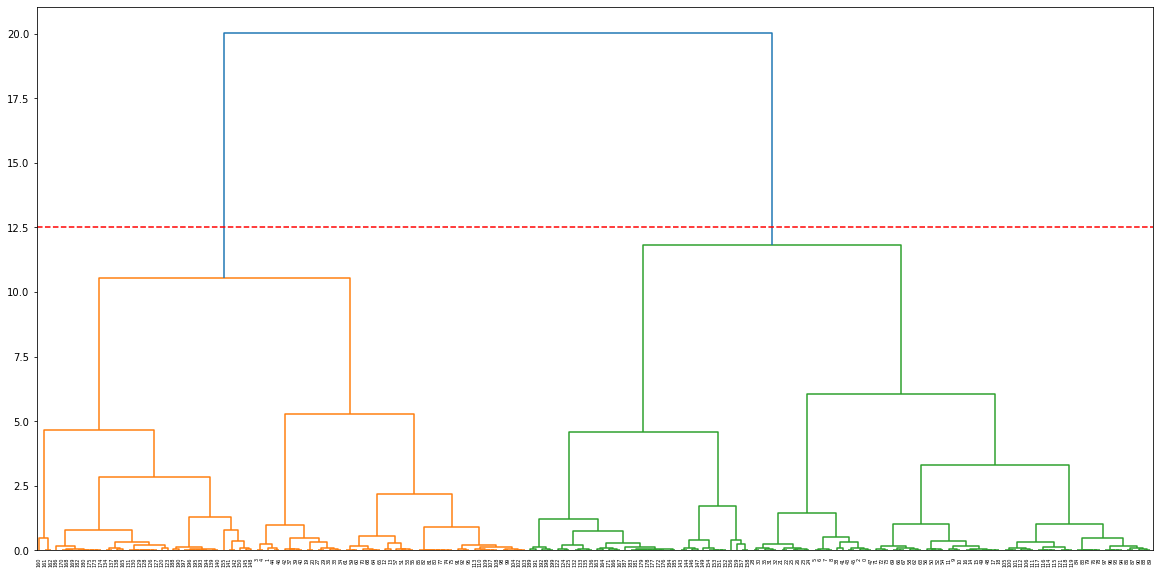

In [21]:
#b. making dendogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))
plt.axhline(y=12.5,color='r', linestyle='--')

##### Dari hasil Dendogram diatas dapat disimpulkan bahwa jumlah cluster yang optimal adalah 2 cluster.

Hierarchical Agglomerative Clustering


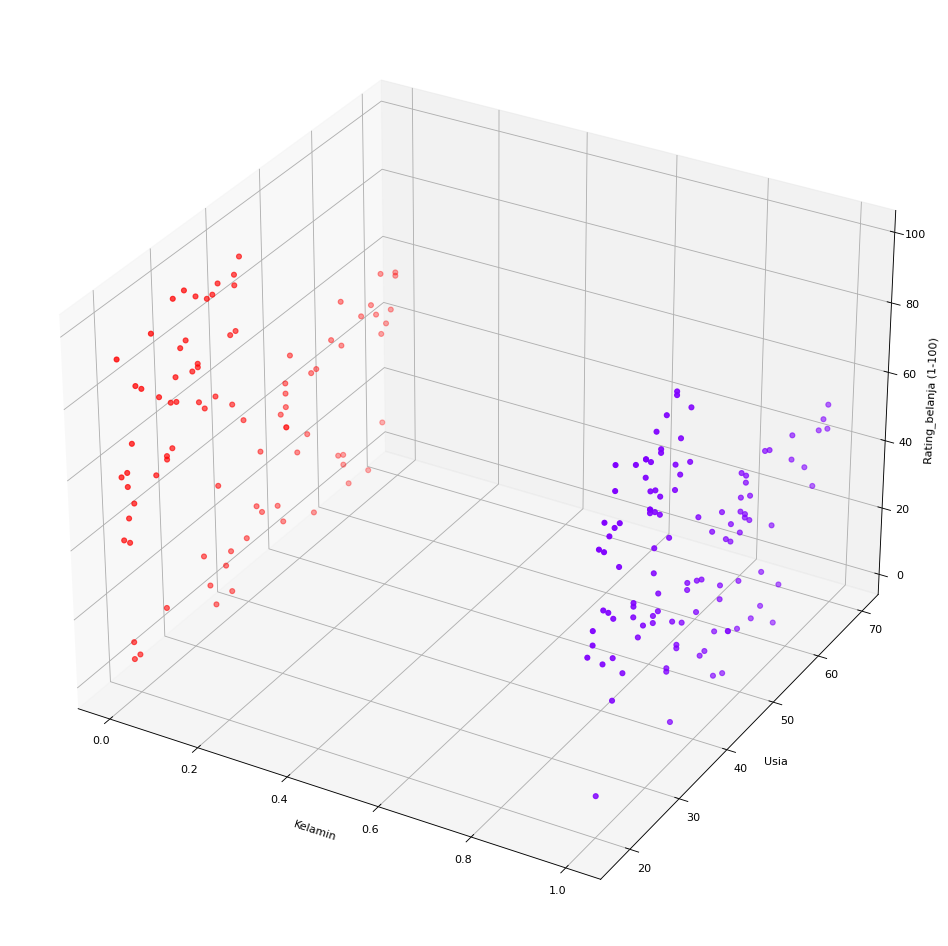

In [22]:
#c. visualisasi hierarchical Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
model = AgglomerativeClustering(n_clusters=2)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15,20), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(cust['Kelamin'],cust['Usia'],cust['Rating_belanja (1-100)'],c=hac_labels,cmap='rainbow')

xLabel = ax.set_xlabel('Kelamin', linespacing=3.2)
yLabel = ax.set_ylabel('Usia', linespacing=3.1)
zLabel = ax.set_zlabel('Rating_belanja (1-100)', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

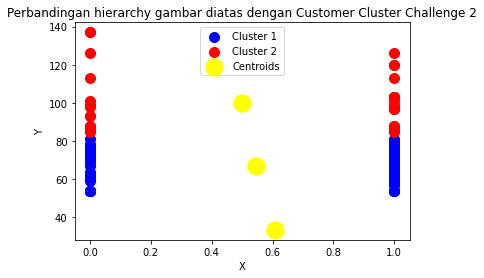

In [23]:
#d. perbandingan visualisasi
plt.scatter(X2[y1_means == 0, 0], X2[y1_means == 0, 1], s = 100, c= 'blue', label = 'Cluster 1')
plt.scatter(X2[y1_means == 1, 0], X2[y1_means == 1, 1], s = 100, c= 'red', label = 'Cluster 2')
#plt.scatter(X2[y1_means == 2, 0], X2[y1_means == 2, 1], s = 100, c= 'magenta', label = 'Cluster 3')
#plt.scatter(X2[y1_means == 3, 0], X1[y1_means == 3, 1], s = 100, c= 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c= 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow', label = 'Centroids')
plt.title('Perbandingan hierarchy gambar diatas dengan Customer Cluster Challenge 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 3.Generate data set sebanyak 500 titik data pelatihan bola dengan label yang sesuai
###### a. lakukan normalisasi fitur pada proses pelatihan data,
###### b. gunakan DBSCAN dari library sklearn
###### c. buatlah untuk kasus spherical dan non spherical data
###### d. Pada kasus non spherical data, uji coba dengan metode K Means dan bandingkan hasilnya.

#### DBSCAN

##### Importing Libraries

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

##### Generate Spherical data and Non Spherical data

In [25]:
# Generating Sperical Data and Non Spherical data
X, y = make_blobs(n_samples=500, centers=1, cluster_std=0.5 ,random_state=42)
X1, y1 = make_moons(n_samples=500, noise=0.1, random_state=0)

##### Preprocessing with StandardScaler(Normalization)

In [26]:
# Normalization
scaler = StandardScaler()
X_sphe = scaler.fit_transform(X)
X_nonsphe = scaler.fit_transform(X1)

##### Modelling and Visualization

In [27]:
# Cluster with DBSCAN
dbscan= DBSCAN(eps=0.5, min_samples=30)
X_sphe_labels = dbscan.fit_predict(X_sphe)
X_nonsphe_labels = dbscan.fit_predict(X_nonsphe)

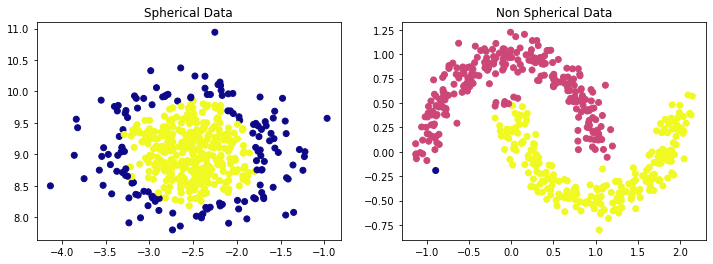

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].scatter(X[:,0], X[:,1], c=X_sphe_labels, cmap='plasma')
ax[0].set_title('Spherical Data')
ax[1].scatter(X1[:, 0], X1[:, 1], c=X_nonsphe_labels, cmap='plasma')
ax[1].set_title('Non Spherical Data')
plt.show()

#### Non Spherical test with KMEANS Clustering

In [29]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

##### Importing Libraries

In [30]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

##### Generate KMEANS random data

In [31]:
Xkmeans, y = make_blobs(n_samples=500, centers=5, cluster_std=0.9)

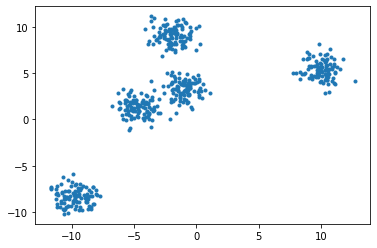

In [32]:
plt.scatter(Xkmeans[:, 0], Xkmeans[:, 1], marker='.')
plt.show()

##### Setting the KMeans

In [33]:
non_sphekmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state= 42)
y_nonsphe_means = non_sphekmeans.fit_predict(Xkmeans)

In [34]:
non_sphekmeans.fit(Xkmeans)

KMeans(n_clusters=5, random_state=42)

In [35]:
non_sphekmeans_labels = non_sphekmeans.labels_
non_sphekmeans_labels

array([0, 3, 2, 1, 0, 4, 2, 2, 1, 2, 0, 2, 1, 3, 4, 0, 1, 2, 0, 0, 4, 1,
       4, 4, 3, 2, 1, 2, 0, 2, 4, 3, 2, 3, 2, 3, 4, 4, 0, 2, 2, 4, 2, 3,
       0, 1, 1, 1, 3, 2, 2, 0, 2, 0, 3, 4, 0, 4, 1, 4, 4, 3, 2, 0, 3, 2,
       0, 1, 2, 4, 1, 3, 4, 0, 4, 2, 4, 0, 3, 2, 0, 0, 1, 3, 1, 4, 1, 0,
       2, 0, 4, 4, 3, 3, 2, 0, 3, 2, 1, 1, 0, 2, 0, 2, 2, 3, 4, 4, 1, 3,
       0, 0, 3, 2, 1, 3, 2, 0, 4, 2, 3, 3, 0, 0, 4, 4, 0, 1, 1, 3, 4, 4,
       1, 0, 0, 4, 1, 3, 2, 2, 0, 3, 0, 3, 2, 2, 2, 4, 0, 2, 1, 4, 1, 3,
       0, 3, 4, 1, 1, 2, 0, 1, 1, 3, 0, 2, 1, 3, 4, 4, 2, 4, 2, 4, 4, 1,
       2, 1, 0, 1, 0, 2, 4, 3, 4, 1, 4, 1, 0, 4, 1, 4, 0, 3, 1, 0, 4, 3,
       3, 4, 4, 1, 0, 0, 4, 1, 2, 0, 0, 1, 4, 0, 3, 1, 2, 3, 1, 4, 0, 1,
       3, 2, 0, 1, 0, 1, 1, 2, 1, 4, 4, 0, 2, 2, 4, 2, 0, 2, 1, 0, 1, 2,
       2, 4, 4, 2, 3, 4, 1, 2, 2, 0, 0, 3, 0, 3, 4, 4, 2, 3, 3, 3, 3, 4,
       2, 1, 3, 3, 2, 0, 1, 0, 1, 1, 4, 3, 2, 4, 0, 0, 3, 3, 1, 3, 4, 2,
       3, 4, 2, 4, 3, 3, 1, 0, 2, 3, 0, 1, 1, 0, 3,

In [36]:
non_sphekmeans_cluster_centers = non_sphekmeans.cluster_centers_
non_sphekmeans_cluster_centers

array([[10.01916082,  5.40897906],
       [-4.69624708,  1.2907402 ],
       [-9.76978229, -8.3877448 ],
       [-1.92433789,  9.12814307],
       [-0.97725822,  3.31505884]])

##### Visualisation

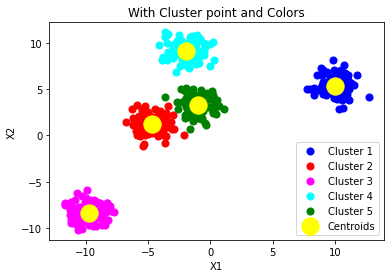

In [37]:
plt.scatter(Xkmeans[y_nonsphe_means == 0, 0], Xkmeans[y_nonsphe_means == 0, 1], s = 50, c= 'blue', label = 'Cluster 1')
plt.scatter(Xkmeans[y_nonsphe_means == 1, 0], Xkmeans[y_nonsphe_means == 1, 1], s = 50, c= 'red', label = 'Cluster 2')
plt.scatter(Xkmeans[y_nonsphe_means == 2, 0], Xkmeans[y_nonsphe_means == 2, 1], s = 50, c= 'magenta', label = 'Cluster 3')
plt.scatter(Xkmeans[y_nonsphe_means == 3, 0], Xkmeans[y_nonsphe_means == 3, 1], s = 50, c= 'cyan', label = 'Cluster 4')
plt.scatter(Xkmeans[y_nonsphe_means == 4, 0], Xkmeans[y_nonsphe_means == 4, 1], s = 50, c= 'green', label = 'Cluster 5')
plt.scatter(non_sphekmeans.cluster_centers_[:,0], non_sphekmeans.cluster_centers_[:,1], s = 300, c ='yellow', label = 'Centroids')
plt.title('With Cluster point and Colors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()